## Problem statement

#### Detecting defective industrial submersible pump impellers is essential for ensuring machinery efficiency and preventing unexpected breakdowns. A CNN-based approach provides an effective solution for classifying bearing conditions by analyzing either image data or vibration signals transformed into images, such as spectrograms. This project focuses on developing and training a CNN model to classify bearings as defective or non-defective based on labeled data.

#### Datset Link: https://www.kaggle.com/datasets/ravirajsinh45/real-life-industrial-dataset-of-casting-product

### Steps:
1. Data Collection and Preparation
2. Data Preprocessing
3. Model Architecture Design
4. Model Training
5. Model Evaluation
6. Performing Predictions

In [ ]:
# importing libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np  

In [ ]:
# setting up the path of the data
train_dir = r"D:\Intership_project_Assignments\Dfective detection\train"
test_dir = r"D:\Intership_project_Assignments\Dfective detection\test"

### Data Preprocessing

In [ ]:
#  Generates batches of tensor image data with real-time data augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=20,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=True)
# Appling normalization
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
#  data pipeline for training and testing a model using image data stored in directories.
 
train_data = train_datagen.flow_from_directory(train_dir,
                                              target_size=(200, 200),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=True)

test_data = test_datagen.flow_from_directory(test_dir,
                                              target_size=(200, 200),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=False)

Found 6633 images belonging to 2 classes.
Found 715 images belonging to 2 classes.


### Insights:
1. **Dataset Size**:

- **Training Data**: The training set contains `6,633 images` distributed across 2 classes.
- **Testing/Validation Data**: The test set comprises `715 images`, also belonging to 2 classes.

2. **Binary Classification**:

- The mention of "belonging to 2 classes" indicates that this is a binary classification problem. The images are labeled as either class 1 or class 2 (e.g., 'Defective' and 'Non-defective' bearings).

In [41]:
for image_batch, labels_batch in train_data:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 200, 200, 3)
(32, 2)


### Insights:

- Batch Size is 32
- Image input shape is (200, 200, 3) -> (width , height, rgb)
- Label Shape is (32, 2) 

In [42]:
# Check class names
class_names = train_data.class_indices
class_names = list(class_names.keys())
print(class_names)

['def_front', 'ok_front']


### Insights:
- Class Names:
  1. def_front
  2. ok_front

In [ ]:
# display a grid of sample images from a data generator
def get_sample_image(generator):
    images, labels = next(generator)
    image = images[0]
    label_index = np.argmax(labels[0])
    label_name = class_names[label_index]

    return image, label_name


def sample_images(generator, nrows=3, ncols=3):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10))
    
    for i in range(nrows*ncols):
        image, label_name = get_sample_image(generator)
        row = i // ncols
        col = i % ncols
        ax = axes[row][col]
        ax.imshow(image)
        ax.set_title(label_name)
        ax.axis('off')

    plt.show()

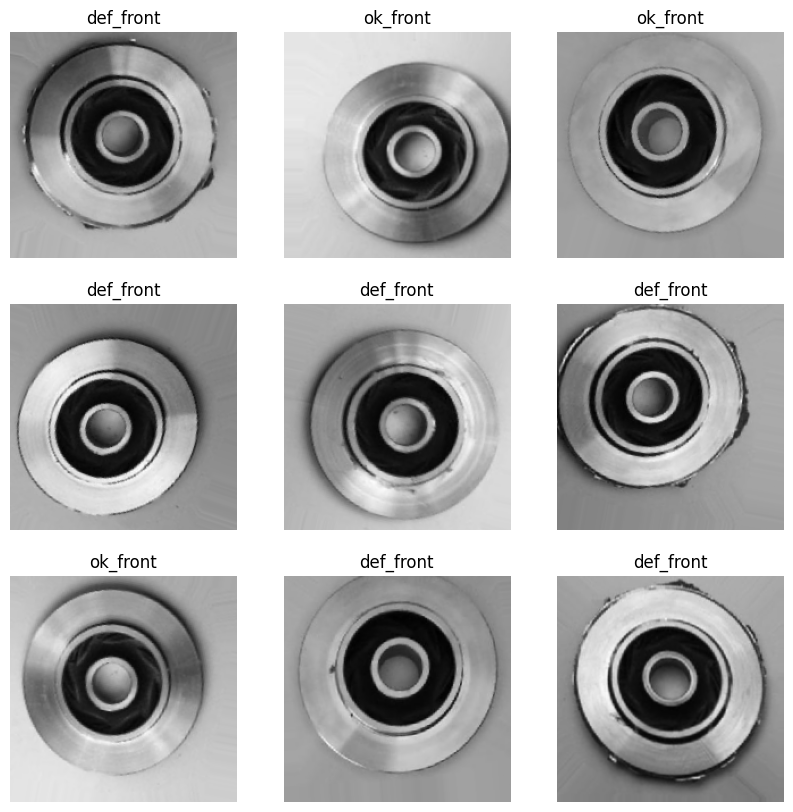

In [44]:
sample_images(train_data, nrows=3, ncols=3)

### CNN Modeling

In [ ]:
# importing libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout

In [47]:
# Model layers
model = Sequential([
    Conv2D(32, (2, 2), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (2, 2), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (2, 2), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(2 ,activation='softmax')
])

In [48]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 199, 199, 32)      416       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 98, 98, 64)        8256      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 49, 49, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 48, 48, 128)       32896     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 24, 24, 128)     

In [50]:
history = model.fit(train_data,
                    epochs=30,
                    batch_size=32,
                    )

Epoch 1/30
208/208 [==============================] - 52s 249ms/step - loss: 0.6658 - accuracy: 0.5913
Epoch 2/30
208/208 [==============================] - 54s 257ms/step - loss: 0.5315 - accuracy: 0.7208
Epoch 3/30
208/208 [==============================] - 54s 260ms/step - loss: 0.3892 - accuracy: 0.8120
Epoch 4/30
208/208 [==============================] - 51s 247ms/step - loss: 0.2198 - accuracy: 0.9207
Epoch 5/30
208/208 [==============================] - 50s 241ms/step - loss: 0.2079 - accuracy: 0.9169
Epoch 6/30
208/208 [==============================] - 50s 240ms/step - loss: 0.1257 - accuracy: 0.9524
Epoch 7/30
208/208 [==============================] - 50s 242ms/step - loss: 0.1286 - accuracy: 0.9483
Epoch 8/30
208/208 [==============================] - 51s 246ms/step - loss: 0.1052 - accuracy: 0.9575
Epoch 9/30
208/208 [==============================] - 70s 338ms/step - loss: 0.0898 - accuracy: 0.9608
Epoch 10/30
208/208 [==============================] - 87s 419ms/step - l

### Model Evaluate

In [51]:
def plot_history(history, metric):
  plt.plot(history.history[metric])
  plt.xlabel('Epochs')
  plt.ylabel(metric)
  plt.show()

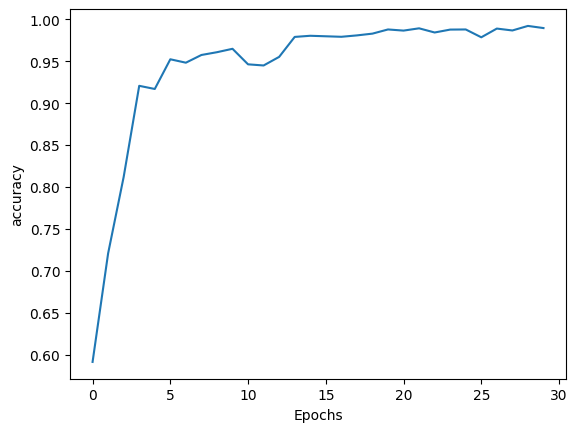

In [52]:
plot_history(history, 'accuracy')

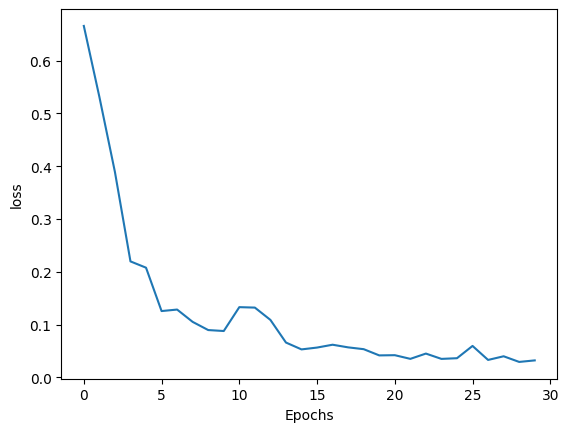

In [53]:
plot_history(history, 'loss')

In [59]:
result = model.evaluate(test_data)
print("Test loss, Test accuracy : ", result)

23/23 [==============================] - 1s 41ms/step - loss: 0.0828 - accuracy: 0.9748
Test loss, Test accuracy :  [0.08279985189437866, 0.9748252034187317]


### Insights from the Training and Test Results:

1. **Training Performance**:
- **Loss**: `0.0828`: The training loss is quite low, indicating that the model is effectively learning from the training data and minimizing the error.
- **Accuracy**: `0.9748 (97.48%)`: The model achieved a very high accuracy on the training set, suggesting it has learned the patterns in the data very well.

2. **Test Performance**:
- **Test Loss**: `0.0828`: The test loss is the same as the training loss, which is a positive sign. This indicates that the model generalizes well to the test data and is not overfitting.
- **Test Accuracy**: `0.9748 (97.48%)`: The test accuracy matches the training accuracy, suggesting that the model is performing consistently and robustly on both the training and unseen test data.

### Visualize predicted images

1/1 [==============================] - 0s 26ms/step


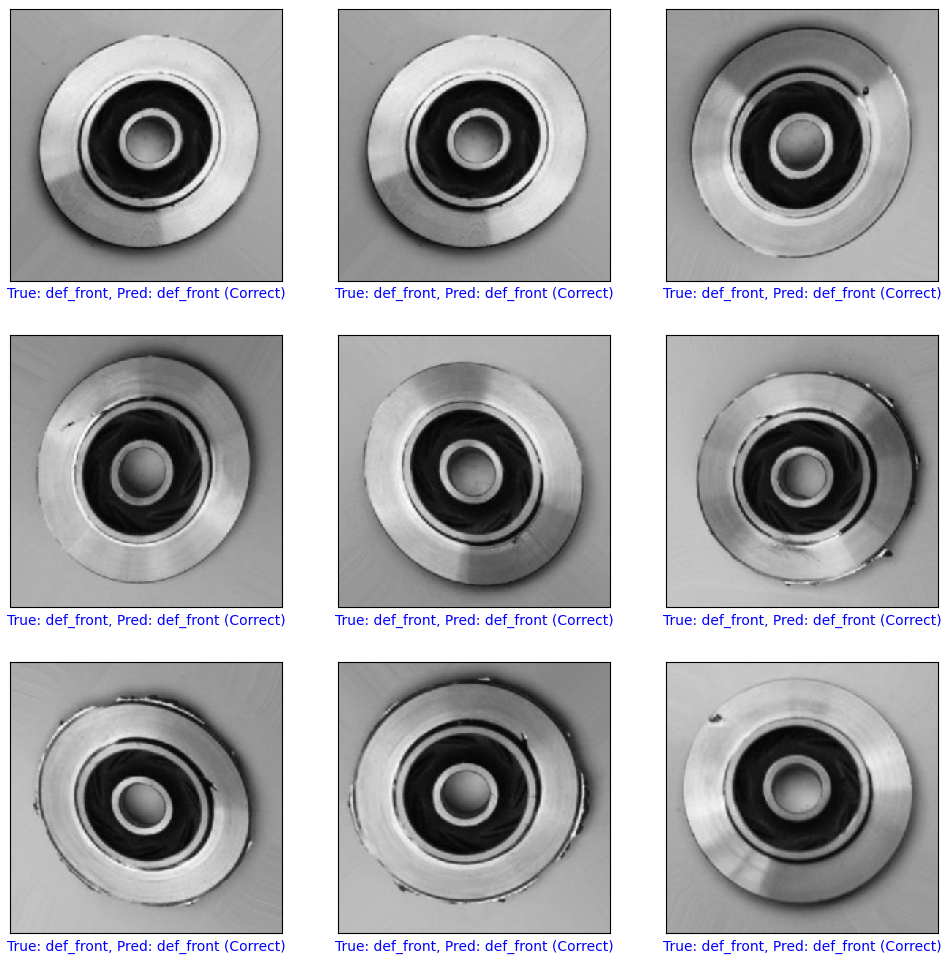

In [62]:
images, labels = next(test_data)    

indices = np.random.choice(range(len(images)), size=9)
images = images[indices]
labels = labels[indices]

predictions = model.predict(images)


class_names=list(test_data.class_indices.keys())


plt.figure(figsize=(12,12))
    
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
        
    image = images[i]
        
    if image.shape[-1] == 1:
        image = np.squeeze(image) 
        
    plt.imshow(image)
        
    predicted_label = np.argmax(predictions[i])
        
    if predicted_label == np.argmax(labels[i]):
        color='blue'
        result_text="Correct"
            
    else:
        color='red'
        result_text="Incorrect"

    label_text="True: "+ class_names[np.argmax(labels[i])] + ", Pred: " + class_names[predicted_label] + f" ({result_text})"        
            
    plt.xlabel(label_text,color=color)

### Overall Insight:

- `High Accuracy (97.48%)`: The model achieved excellent performance on both the training and test sets, indicating strong learning.

- `Low Loss (0.0828)`: The low loss values suggest that the model is making accurate predictions with minimal error.

- `Good Generalization`: The similar accuracy on both training and test sets indicates the model has generalized well and is not overfitting.